## Analyze A/B Test Results



## Table of Contents

- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)






<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#Reading the data and store it into file.
df = pd.read_csv('ab_data.csv')
df.head(7)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
#Finding the number of rows and columns.
df_rows = df.shape[0]
df.shape

(294478, 5)

_**There is almost 295k rows and 5 columns.**_

c. The number of unique users in the dataset.

In [4]:
#Finding the unique users.
unique_users = df['user_id'].nunique()
(unique_users , df_rows - unique_users)

(290584, 3894)

_**There is almost 290k rows with unique users and Appearntly there is around 4k rows with repeated useres**_.

d. The proportion of users converted.

In [5]:
#Finding the proportion of converted users.
df_converted = df.query('converted == "1"')
df_converted.user_id.count()/df.user_id.count()

0.11965919355605512

_**around 12% of the users convert their page.**_

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
#Checking the unmatch rows.
df_dont_match1 = df.query('landing_page == "new_page" and group != "treatment"')

df_dont_match2 = df.query('landing_page != "new_page" and group == "treatment"')

total_unmatch_rows = df_dont_match1.shape[0] + df_dont_match2.shape[0]

total_unmatch_rows


3893

_**There is 3893 unmatch rows and we will deal with later.**_

f. Do any of the rows have missing values?

In [7]:
#Finding the number of rows missing values.
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

_**It turns out that there is no missing values.**_

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#Creat new table carrying all unmatch rows
df_dont_match = df_dont_match1.append(df_dont_match2).index
df_dont_match.shape

(3893,)

_**Prepare All undesire rows to get rid of it.**_

In [9]:
#drop unmatch rows.
df2 = df.drop(df_dont_match)
df2.count()

user_id         290585
timestamp       290585
group           290585
landing_page    290585
converted       290585
dtype: int64

_**Number of rows after filteration process.**_

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
#Checking unique users.
df2_rows = df2.shape[0]
unique_users2 = df2['user_id'].nunique()
(unique_users2 , df2_rows - unique_users)

(290584, 1)

_**All the users are unique in the new table except one user.**_

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
#Finding the repeated user
df2[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


_**User number 773192 is repeated user**_

c. What is the row information for the repeat **user_id**? 

In [13]:
#Checking the repeated user
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


_**Total info about user number 773192**_

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
#Dropping one of duplicated user
df2.drop(2893 , inplace = True)

_**Row number 2893 is dropped.**_

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
#Finding the probability of converting
df2['converted'].mean()

0.11959708724499628

_**11.96% of users are likely to convert thier page.**_

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
#Probability of converting from control group 
df2[df2['group'] == 'control']['converted'].mean()

0.1203863045004612

_**12% of users with control group are likely to convert thier page.**_

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
#Probability of converting from treatment group 
df2[df2['group'] == 'treatment']['converted'].mean()

0.11880806551510564

_**11.8% of users with treatment  are likely to convert thier page.**_

d. What is the probability that an individual received the new page?

In [18]:
#Probability of receiving new page
(df2['landing_page']  == 'new_page').mean()

0.50006194422266881

_**Probability of receiving new page is 50%**_

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Based on our results we can conclude that there is no strong evidance prove treatment lead to conversions , beside that the probability of convert from treatment group is lower that convert from control group.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

_**Hypothesis**_

**Null hypothesis :** **$p_{old}$ ≥ $p_{new}$**




**Alternative hypothesis :** $p_{old}$ < $p_{new}$ 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [19]:
#Assuming that under null hypothesis our new and old pages are equal
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [20]:
#Assuming that under null hypothesis our new and old pages are equal
p_old = df2['converted'].mean()
p_old

0.11959708724499628

_**11.96% of users are likely to convert thier page.**_

c. What is $n_{new}$, the number of individuals in the treatment group?

In [21]:
#Number of rows with treatment group.
n_new = df2.query('group == "treatment"').shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [22]:
#Number of rows with control group.
n_old = df2.query('group == "control"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
#Simulating the new page transction with conversion rate under null hypothesis.
new_page_converted = np.random.choice([1 , 0] , size=n_new , p = [ p_new , (1-p_new)])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
#Simulating the new page transction with conversion rate under null hypothesis.
old_page_converted = np.random.choice([1 , 0] , size=n_old , p = [ p_old , (1-p_old)])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
# the resut should be approximately equal to zero , due the assumption of null hypthesis

converted_differnce = (new_page_converted.mean()-old_page_converted.mean())
converted_differnce 

-0.00018800863066360807

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [26]:
#bootstrapping new 10,000 simulation to take a look overthe disturbution in order to make accurate analysis.
p_diffs = []
for i in range(10000) : 
    new_page_converted = np.random.choice([1 , 0] , size=n_new , p = [ p_new , (1-p_new)])
    old_page_converted = np.random.choice([1 , 0] , size=n_old , p = [ p_old , (1-p_old)])
    differnce = new_page_converted.mean()-old_page_converted.mean()
    p_diffs.append(differnce)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

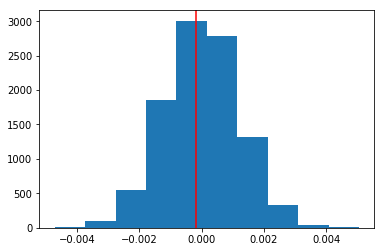

In [27]:
# Plotting the differnce of p
plt.hist(p_diffs)
plt.axvline(converted_differnce , c='r');

**As the null hypothesis claimed , there is no much differnce between the probaility of conversion rate of  new and old pages.**


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
#Computing the p-value
( p_diffs > converted_differnce ).mean()

0.56130000000000002

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Since the p-value is equal to 0.561 which is much greater than alpha at level of 0.05 , statically we  failed to reject the null hypothesis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
#Calculating the number of conversion of each page.
import statsmodels.api as sm

convert_old = df2.query('group == "control"')['converted'].sum()
convert_new = df2.query('group == "treatment"')['converted'].sum()

(convert_new , convert_old , n_new , n_old)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(17264, 17489, 145310, 145274)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [30]:
#By using the statistic library and bulit-in functions  we can easily get p-value , z-score , t-score and more.
( z_score , p_value) = sm.stats.proportions_ztest([ convert_new, convert_old] , [n_new , n_old] , alternative = 'larger' , prop_var = False)
( z_score , p_value)

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Since the z-socre is equal to 1.31 , which is less than 1.96 (equivalent to 95% confidnce) we again failed to reject the null hypothesis  .**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Because the response variable is Binary , it is recomanded to follow Logistic Regression approach. .**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:
#Creating duumy values and intercept
df2['intercept'] = 1
df2[['old_page', 'ab_page' ]] = pd.get_dummies(df2['group'])
df2.head(4)


,user_id,timestamp,group,landing_page,converted,intercept,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [32]:

import statsmodels.api as sm

logit = sm.Logit(df2['converted'],df2[['intercept','ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
# Finding the satistcal summary.
lm = sm.OLS(df2['converted'], df2[['intercept', 'ab_page']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.719
Date:                Sun, 12 Jul 2020   Prob (F-statistic):              0.190
Time:                        03:43:39   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290582   BIC:                         1.706e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1204      0.001    141.407      0.000       0.119       0.122
ab_page       -0.0016      0.001     -1.311      0.190      -0.004       0.001
==============================================================================
Omnibus:                   125553.456   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414313.355
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**P-value = 0.190 and it still above the alpha (0.05) , the differnce here is we performed one-tail test in part II and here by following Logistic Regression approach we performed two tailed test.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Considering other factors allow us to know all the factors that might contribute to effect the response variable , however sometimes there is uncontrollable variables and under certain circumstances there is no need to consider it in our test.**

**An interaction between variables could mislead us to wrong conclusion if we dont know how to deal with it properly.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns -  Provide the statistical output as well as a written response to answer this question.

In [34]:
#Checking the file.
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [35]:
#merging the two tables by setting the column user_id as index.
df_comb = df_countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_comb.head()


,country,timestamp,group,landing_page,converted,intercept,old_page,ab_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [36]:
#creating dummies for each country.

df_comb[['CA', 'UK', 'US']] = pd.get_dummies(df_comb['country'])
df_comb.head()

,country,timestamp,group,landing_page,converted,intercept,old_page,ab_page,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


In [37]:
#Finding the stastical summary and obtaining the results.
#CA is the base variable here.
df_comb['intercept'] = 1;

lm = sm.Logit(df_comb['converted'], df_comb[['intercept','UK','US',]])
results = lm.fit()
results.summary2()


Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-07-12 03:43 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
==================================================================

"""

**Since P-value of all countries above alpha (0.05) we can say that countries dont have any significant effect on conversion rate.**

**We fail to reject the null hypothesis.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [38]:
#Making interaction between page and countries

df_comb['UK_ab_page'] = df_comb['ab_page']* df_comb['UK']
df_comb['US_ab_page'] = df_comb['ab_page']* df_comb['US']
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 834778 to 934996
Data columns (total 13 columns):
country         290584 non-null object
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
intercept       290584 non-null int64
old_page        290584 non-null uint8
ab_page         290584 non-null uint8
CA              290584 non-null uint8
UK              290584 non-null uint8
US              290584 non-null uint8
UK_ab_page      290584 non-null uint8
US_ab_page      290584 non-null uint8
dtypes: int64(2), object(4), uint8(7)
memory usage: 17.5+ MB


In [39]:
#Finding the stastical summary and obtaining the results.
#CA and old_page are the base variable here.
lm = sm.Logit(df_comb['converted'], df_comb[['intercept','UK','US','UK_ab_page','US_ab_page' , 'ab_page']])
results = lm.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-07-12 03:43 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK_ab_page     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
US_ab_page     0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
==================================================================

"""

**Since the p-value of UK_ab_page and US_ab_page are above alpha (0.05) , we can say that the interaction of page and country dont effect the conversion rate.**

**We fail to reject the null hypothesis.**

## Conclusion

**In conclusion we have followed three approaches and all of them led us to the same result which is proved satistcally there is no signifcant differnce between the old and new page on the effect of conversion rate.**

**it turned out that countries dont have any influnce on the conversion rate.**


## Recommendation

**There is no need to change the page since they all have the same influnce.**

In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0